In [2]:
import torch
import matplotlib.pyplot as plt

from svetlanna import elements
from svetlanna import SimulationParameters
from svetlanna import wavefront
from svetlanna.units import ureg
from svetlanna import LinearOpticalSetup

# Распространение волнового фронта в свободном пространстве

**Волновой фронт** — это геометрическое место точек среды, в которых колебания, вызванные распространением волны, происходят в одной и той же фазе. Проще говоря, это поверхность, до которой волна дошла к определённому моменту времени, то есть граница между возмущённой (где волна уже есть) и невозмущённой областью среды.

Мы будем рассматривать распространение волнового фронта в однородной и изотропной среде. Однородность среды (или пространства) означает, что её физические свойства одинаковы во всех точках. То есть нет такой точки, относительно которой среда выделялась бы особенными свойствами — все точки равноценны, и перемещение замкнутой системы из одного места в другое не изменяет ход физических процессов внутри неё. Изотропность среды означает, что её физические свойства одинаковы во всех направлениях. То есть поворот замкнутой системы в пространстве не меняет её физических свойств, и в среде нет выделенного направления.

Волновой фронт в общем случае описывается векторным полем $\vec{E}(x,y,z)=\left(E_x(x,y,z), E_y(x,y,z), E_z(x,y,z)\right)$. Для того, чтобы понять, как это поле изменится по мере распространения в среде, необходимо решить уравнение Гельмгольца
$$
(\Delta + k^2)\vec{E}(x,y,z)=0,
$$
где $$|k|=\dfrac{2\pi}{\lambda}$$.

В случае линейно поляризованных и монохроматичных волн это же уравнение можно свести к скалярному, т.е. применить к какой-то одной компоненте векторного поля $\vec{E}$:
$$
(\Delta + k^2)E(x,y,z)=0,
$$

Решение уравнение Гельмгольца - плоская волна:

$$
E(\vec{r})=E(x,y,z)=A\exp({i\vec{k}\vec{r}})=A\exp(i[k_xx + k_yy +k_zz]),
$$

где $A$ - амплитуда волны, $\vec{k}$ - волновой вектор и $k^2=k_x^2 + k_y^2 +k_z^2$

Более сложные волновые фронты можно разложить по плоским волнам, т.е. представить исходный волновой фронт как суперпозицию плоских волн. Для того, чтобы получить это разложение, можно использовать преобразование Фурье, с помощью которого мы получем набор амплитуд и частот, участвующих в разложении поля.

# Метод углового спектра

Любой волновой фронт можно разложить на набор плоских волн. Поскольку каждая волна является решением уравнения Гельмгольца, то их суперпозиция - так же будет является решением. 

Одна плоская волна при распространении на некоторое расстояние $z>0$ приобретает набег фазы, равный
$$
e^{ik_zz}=\exp(iz\sqrt{k^2-k_x^2-k_y^2}),
$$
соответственно идея метода углового спектра заключается в том, чтобы каждую плоскую волну с характерным волновым вектором $\vec{k}$ домножить на соответствующий набег фазы, вызванный распространением в свободной среде, после чего сложить их обратно. Так можно получить преобразованный исходный волновой фронт в результате распространения. 

Таким образом, метод углового спектра заключается в:
1. Получаем набор плоских волн $E(k_x,k_y,0)$, по которому раскладывается изначальный волновой фронт в точке $E(x,y,0)$, с помощью прямого преобразования Фурье:
$$
E(k_x,k_y,0) = \mathcal{F}\left[E(x,y,0)\right]
$$
2. Умножаем каждую плоскую волну на соответствующий набег фазы, что описывается функцией отклика $H(k_x,k_y,z)$, после чего получаем набор плоских волн $E(k_x,k_y,z)$, по которому раскладывается распространенное поле $E(x,y,z)$:
$$
E(k_x,k_y,z)=E(k_x,k_y,0) \cdot H(k_x,k_y,z)
$$

3. С помощью обратного преобразования Фурье получаем уже распространенный волновой фронт $E(x,y,z)$, зная набор плоских волн, по которому он раскладывается:
$$
E(x,y,z)=\mathcal{F}^{-1}\left[E(k_x,k_y,z)\right]
$$


## Задание 1

Для любого численного моделирования необходимо задать расчетную сетку - объект, на основе которого будут проводиться все вычисления(по сути это аргументы ваши функции, т.е. значения набор значений (x,y)). Поскольку для вычислительных машин не существует непрерывных и бесконечных величин, необходимо задать некоторый интервал значений вдоль каждой из осей $x$ и $y$, а так же определить количество узлов(точек), которые на этом интервале будут участвовать в расчетах. 

Мы будем рассматривать "экран", геометрический размер которого составляет $l_x\times l_y$. Соответствующее количество расчетных узлов вдоль каждой из соей составляет $N_x \times N_y$.
Помимо этого, необходимо определить длину волны светового пучка, с которым вы будете работать.

Для того, чтобы инициализировать параметры расчетной сетки, вам необходимо создать экземпляр класса ```SimulationParameters``` и инициализировать его с помощью словаря, содержащего аргументы $\{'H':..., 'W': ..., 'wavelength'\}$.

В нашей библиотеке есть класс ```FreeSpace```, который представляет собой изложенный выше метод углового спектра. Он принимает на вход параметры расчетной сетки ```simulation_parameters```, расстояние```distance```, на которое будет распространяется волновой фронт. После инициализации экземпляра класса, с помощью вызова метода ```forward```, передав в качестве аргумента ваш волновой фронт, можно найти его после распространения в среде, инициализированной ранее в экземпляре класса ```FreeSpace```.

1. Создайте расчетную сетку с помощью класса ```SimulationParameters```

2. С помощью класса ```Wavefront``` создайте плоскую волну с произвольным волновым вектором $\vec{k}=(a, b, c)$.

2. С помощью аналитически известного выражения, описывающего плоскую волну, и с помощью метода углового спектра, представленным классом ```FreeSpace```, распространите плоскую волну на некоторое расстояние $z>o$. Сравните получившиеся распределения интенсивности. 

3. Проделайте эти же пункты для пучка Гаусса с помощью вызова метода ```gaussian_beam``` для класса ```Wavefront```


In [3]:
lx = 20 * ureg.mm
ly = 10 * ureg.mm

Nx = 512
Ny = 512

wavelength = 1064 * ureg.nm # почему столько

sim_params = SimulationParameters({"W" :torch.linspace(-lx/2,lx/2, Nx), "H" : torch.linspace(-ly/2, ly/2, Ny), "wavelength": wavelength})

In [7]:
z = 100 * ureg.mm

plane_wave = wavefront.Wavefront.plane_wave(sim_params, z, [0, 0, 1])

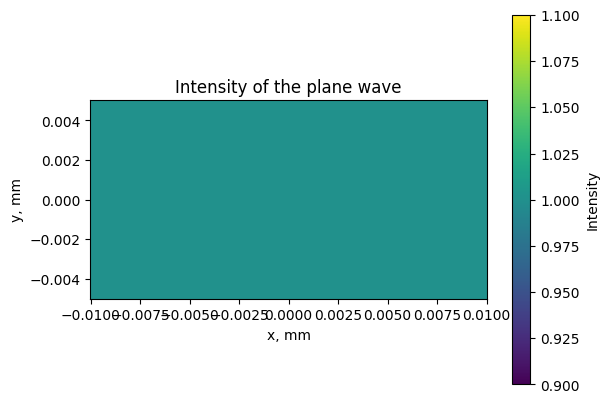

In [36]:
def plot(intensity, name='Intensity of the plane wave'):
    fig, ax = plt.subplots()
    im = ax.pcolormesh(*sim_params.meshgrid(x_axis='W', y_axis='H'), intensity)
    
    ax.set_xlabel('x, mm')
    ax.set_ylabel('y, mm')
    ax.set_aspect('equal')
    ax.set_title(name)
    fig.colorbar(im, ax=ax, label='Intensity')
plot(plane_wave.intensity)

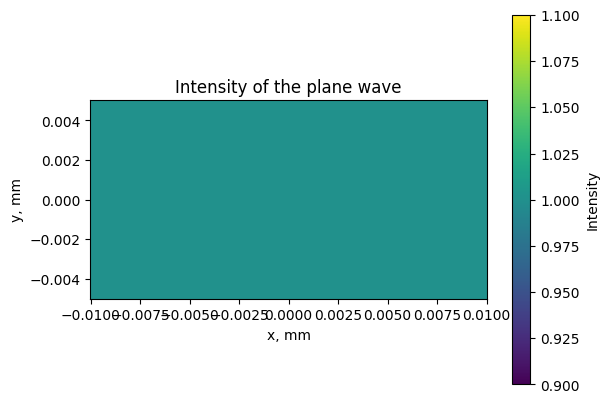

In [37]:
z1 = 30 * ureg.mm
z2 = z - z1
# дифф решетка vs транспарант
free_space = elements.FreeSpace(sim_params, z2, "AS")
plane_wave_incident = wavefront.Wavefront.plane_wave(sim_params, z1, [0, 0, 1])

output_plane_wave = free_space.forward(plane_wave_incident)
plot(output_plane_wave.intensity)

# Апертуры

Одно из самых интересных явлений в оптике - дифракция света. Дифракция — это явление огибания волнами препятствий или отклонения волн от прямолинейного распространения, что приводит к появлению характерных интерференционных картин света или других волн. Проще говоря, когда волна встречает на своем пути препятствие или проходит через узкое отверстие, она не просто продолжается по прямой, а «огибает» края этого препятствия, распространяясь в область геометрической тени и создавая сложные узоры из максимумов и минимумов интенсивности.

На практике для управляемого изменения волнового фронта используют различные дифракционные элементы. В частности, используются апертуры различной формы для фокусировки пучка.

В нашей библиотеке апертуры произвольной, круглой и прямоугольной форм представлены в модуле ```elements``` классами ```Aperture```, ```RoundAperture``` и ```RectangularAperture``` соответственно. 

## Задание 2

Рассмотрите плоскую волну(пучок Гаусса), которая падает на апертуру. С помощью средств библиотеки рассчитайте дифракционную картину, которая получится после распространения света от апертуры до экрана на некоторое расстояние $z>0$. Необходимо использовать как класс ```Aperture```, так и класс ```FreeSpace```

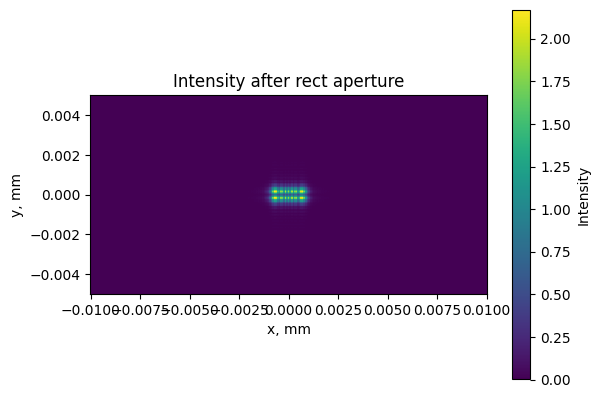

In [39]:
z0 = 15 * ureg.cm

w = 1 * ureg.mm
h = 2 * ureg.mm


aperture = elements.RectangularAperture(sim_params, w, h)
transmitted_wavefront = aperture.forward(output_plane_wave)
space = elements.FreeSpace(sim_params, z0, "AS")
after = space.forward(transmitted_wavefront)

plot(after.intensity, "Intensity after rect aperture")

# Опыт Юнга

Интерференция — это физическое явление, при котором происходит взаимное увеличение или уменьшение результирующей амплитуды двух или нескольких когерентных волн при их наложении друг на друга.

Когда волны накладываются, их колебания складываются по принципу суперпозиции: в тех точках, где волны совпадают по фазе, амплитуды усиливаются, образуя интерференционные максимумы (яркие полосы или участки), а в тех местах, где волны находятся в противофазе, амплитуды уменьшаются или взаимно гасятся, образуя интерференционные минимумы (тёмные полосы или участки).

Для наблюдения устойчивой интерференционной картины необходимо, чтобы волны были когерентными — то есть имели постоянную разность фаз во времени и одинаковую частоту. Если волны некогерентны, интерференционные эффекты усредняются и не дают ярко выраженной картины

Опыт Юнга (двухщелевой эксперимент) — это классический физический опыт, который Томас Юнг провёл в 1801 году для изучения природы света. Суть эксперимента такова: на непрозрачном экране делают две узкие, близко расположенные щели, через которые пропускают свет от одного источника. За щелями располагают экран для наблюдения картины, возникающей после прохождения света через щели

В результате на экране появляется не две светлых полосы (как ожидалось бы для частиц), а сложная чередующаяся система светлых и тёмных полос — интерференционная картина. Это объясняется тем, что свет, проходя через обе щели, ведёт себя как волна: волны от каждой щели накладываются друг на друга, усиливаясь в одних местах (светлые полосы) и ослабляясь в других (тёмные полосы)

Что доказал опыт Юнга:

1. Доказательство волновой природы света. Появление интерференционной картины возможно только при наложении волн, а не частиц. Это стало решающим аргументом в пользу волновой теории света, опровергнув исключительно корпускулярную (частичную) теорию Ньютона, господствовавшую до этого опыта.

2. Введение понятия интерференции. Юнг впервые ввёл термин и объяснил явление интерференции — наложения волн с одинаковой частотой, приводящего к усилению или ослаблению результирующей волны.

3. Демонстрация когерентности. Эксперимент показал важность когерентности (согласованности фаз) для возникновения устойчивой интерференционной картины

## Задание 3

1. С помощью класса ```Aperture``` из модуля ```elements``` создайте апертуру, состоящую из двух тонких щелей

2. Посчитайте дифракционную картину, которая получается после прохождения светового пучка через апертуру на расстоянии $z>0$

3. Сравните положения максимумов интенсивности дифракционной картины с аналитически известными значениями